# Get everything ready

In [4]:
import pandas as pd
import json

In [5]:
with open("/Users/benjamin/dev/climate_sensor/climate_data.json", "r") as fp:
    data = json.load(fp)
    df = pd.DataFrame(data)
    print(df)

                       timestamp  location  temperature  humidity
0     2021-08-29 02:05:34.984113  basement         21.0      73.0
1     2021-08-29 02:05:38.513170  basement         20.0      72.0
2     2021-08-29 02:05:42.042295  basement         20.0      72.0
3     2021-08-29 02:05:45.573211  basement         21.0      73.0
4     2021-08-29 02:05:49.103348  basement         20.0      72.0
...                          ...       ...          ...       ...
5097  2021-08-29 19:23:51.412324  basement         22.0      66.0
5098  2021-08-29 19:24:02.354298  basement         22.0      66.0
5099  2021-08-29 19:24:13.298928  basement         22.0      66.0
5100  2021-08-29 19:24:24.214027  basement         22.0      66.0
5101  2021-08-29 19:24:35.148233  basement         22.0      66.0

[5102 rows x 4 columns]


## Covert the timestamp to a datetime data type

In [21]:
df['timestamp'] =  pd.to_datetime(df['timestamp'], utc=True, infer_datetime_format=True)

## Plot the raw data

<AxesSubplot:xlabel='timestamp'>

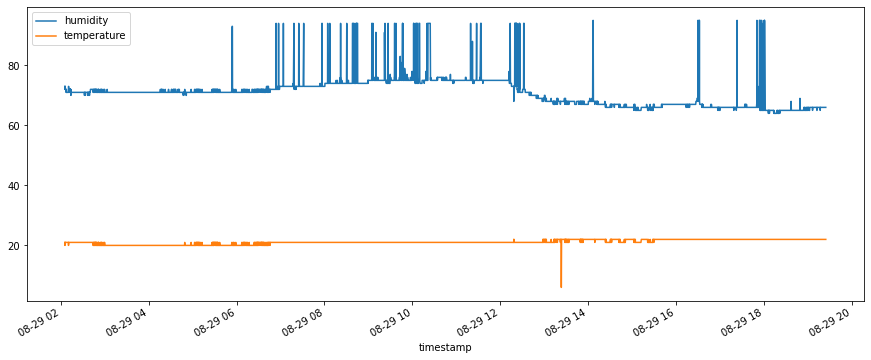

In [39]:
df.plot(x='timestamp', y=['humidity', 'temperature'], kind='line', figsize=(15,6))
# df.plot(x='timestamp', y='temperature', kind='line', style='g', figsize=(15,6))

# Group the time into 10 minute intervals
Smooths out the data and aggregates to the mean to avoid the outlier data

In [58]:
agg_10m = df.groupby(pd.Grouper(key='timestamp', freq='10Min')).median()


In [59]:
agg_10m

,temperature,humidity
timestamp,,
2021-08-29 02:00:00+00:00,21.0,72.0
2021-08-29 02:10:00+00:00,21.0,71.0
2021-08-29 02:20:00+00:00,21.0,71.0
2021-08-29 02:30:00+00:00,21.0,71.0
2021-08-29 02:40:00+00:00,21.0,72.0
...,...,...
2021-08-29 18:40:00+00:00,22.0,65.0
2021-08-29 18:50:00+00:00,22.0,65.0
2021-08-29 19:00:00+00:00,22.0,66.0


<AxesSubplot:title={'center':'Temperature and Humidty'}, xlabel='timestamp'>

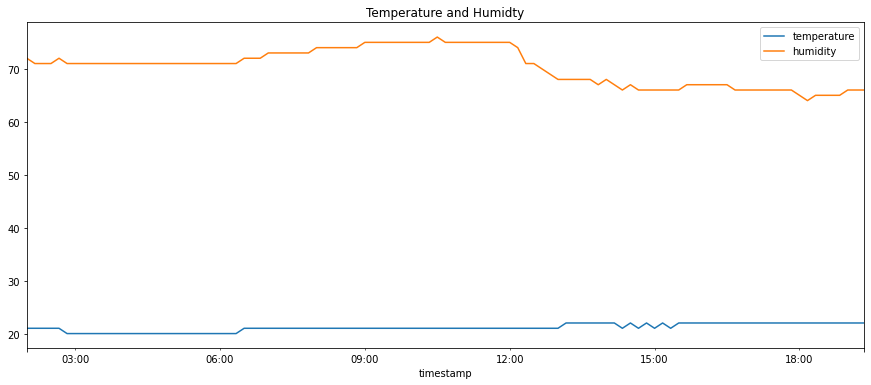

In [60]:
agg_10m.plot(kind='line', title="Temperature and Humidty", figsize=(15,6))
# df.plot(x='timestamp', y=['humidity', 'temperature'], kind='line', figsize=(15,6))
